In [27]:
import numpy as np
import pandas as pd
import os,shutil
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.0.1'

In [3]:
original_dataset_dir = '/Users/aishwaryamv/Downloads/dogs-vs-cats/train'

In [4]:
base_dir = '/Users/aishwaryamv/Downloads/cats_and_dogs_small' 


In [5]:
train_dir = os.path.join(base_dir, 'train') 

validation_dir = os.path.join(base_dir, 'validation') 

test_dir = os.path.join(base_dir, 'test') 


In [6]:
train_cats_dir = os.path.join(train_dir, 'cats') 


In [7]:
train_dogs_dir = os.path.join(train_dir, 'dogs') 


In [8]:
validation_cats_dir = os.path.join(validation_dir, 'cats') 

validation_dogs_dir = os.path.join(validation_dir, 'dogs') 


In [9]:
test_cats_dir = os.path.join(test_dir, 'cats') 

test_dogs_dir = os.path.join(test_dir, 'dogs') 


In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst)


In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst)

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [16]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [17]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [18]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [20]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
                      metrics=['acc'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory( 
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator( train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 51s 512ms/step - loss: 0.6937 - acc: 0.5130 - val_loss: 0.7270 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 43s 432ms/step - loss: 0.6680 - acc: 0.5985 - val_loss: 0.6558 - val_acc: 0.6460
Epoch 3/30
100/100 [==============================] - 41s 408ms/step - loss: 0.6213 - acc: 0.6610 - val_loss: 0.5070 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 39s 393ms/step - loss: 0.5789 - acc: 0.6980 - val_loss: 0.4559 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 41s 407ms/step - loss: 0.5448 - acc: 0.7250 - val_loss: 0.4953 - val_acc: 0.6640
Epoch 6/30
100/100 [==============================] - 40s 398ms/step - loss: 0.5160 - acc: 0.7400 - val_loss: 0.8283 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 40s 397ms/step - loss: 0.4853 - acc: 0.7665 - val_loss: 0.3817 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 4

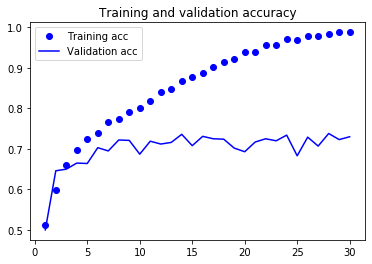

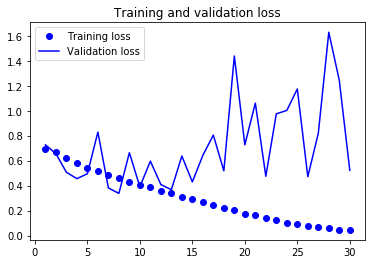

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
img_path = '/Users/aishwaryamv/Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(150, 150)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

In [31]:
print(img_tensor.shape)

(1, 150, 150, 3)


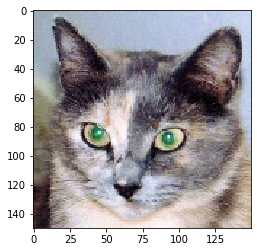

In [32]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0]) 
plt.show()

In [36]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

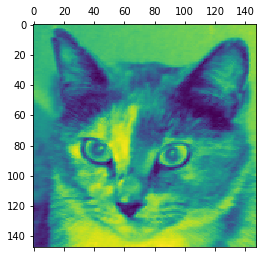

In [37]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


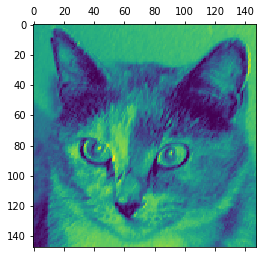

In [38]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

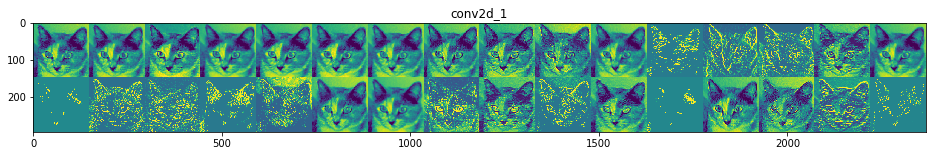

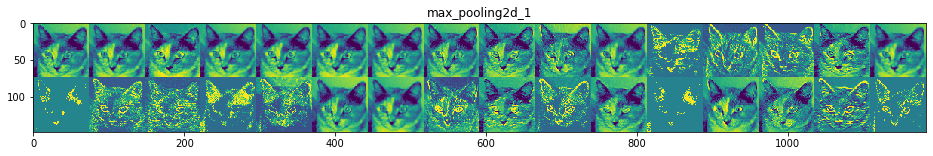

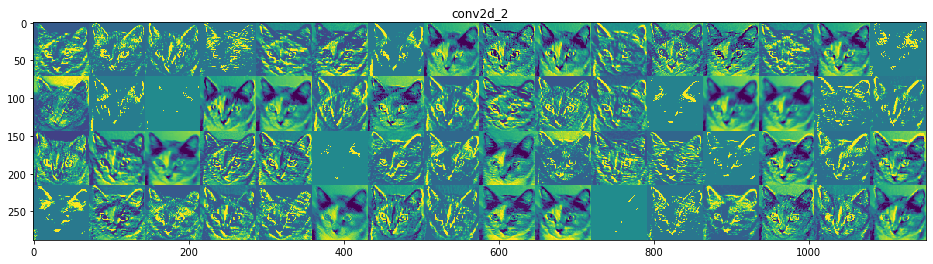

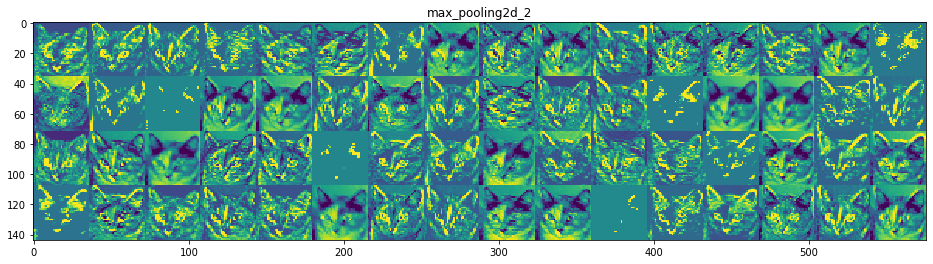

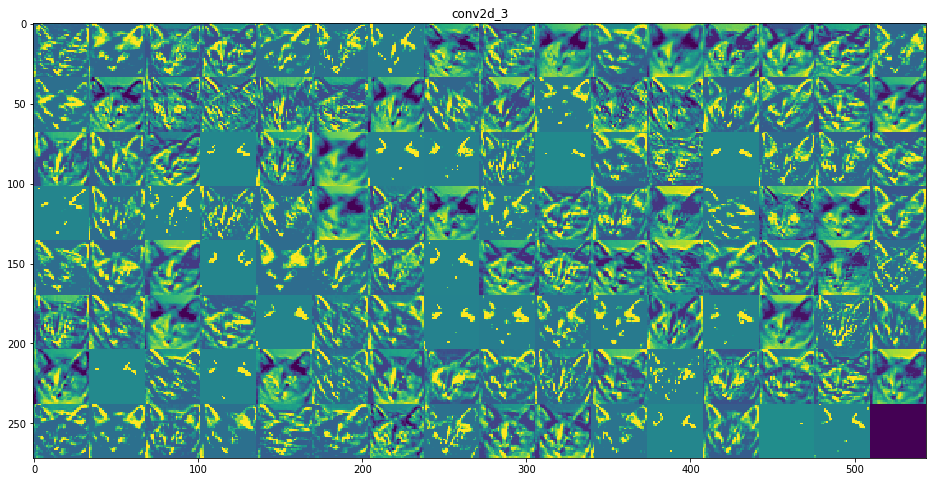

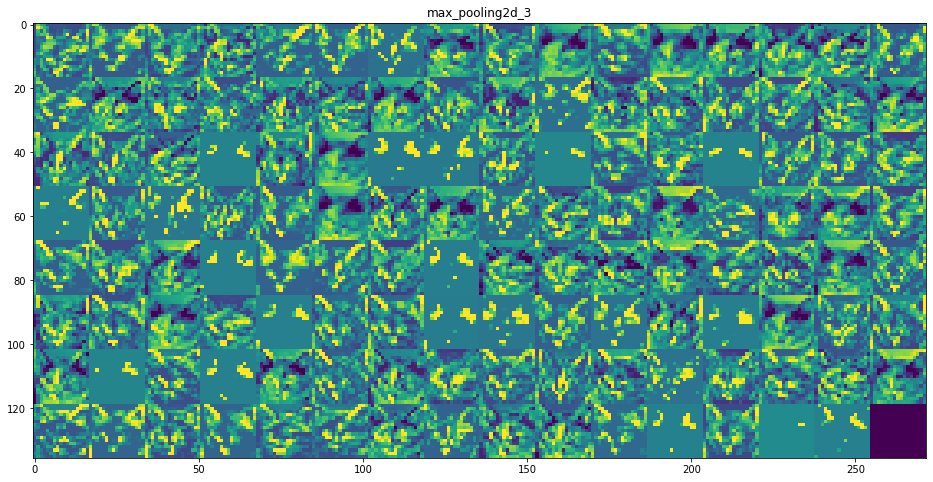

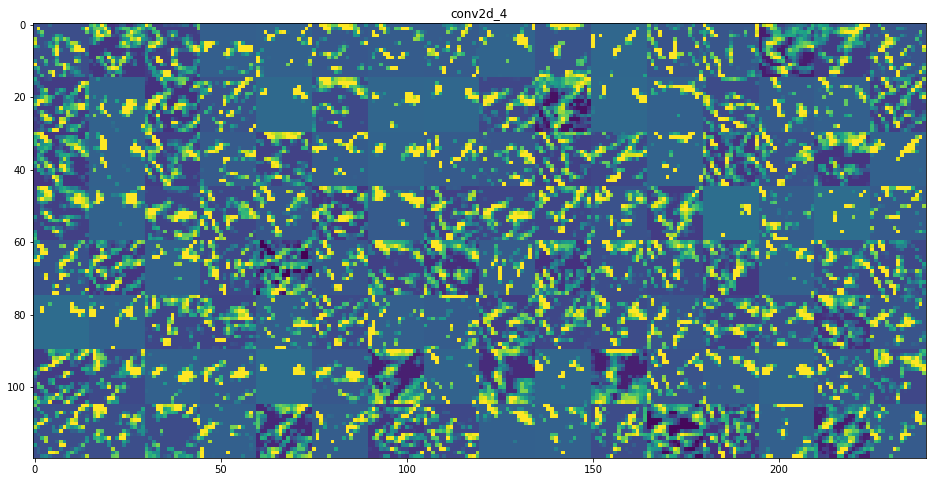

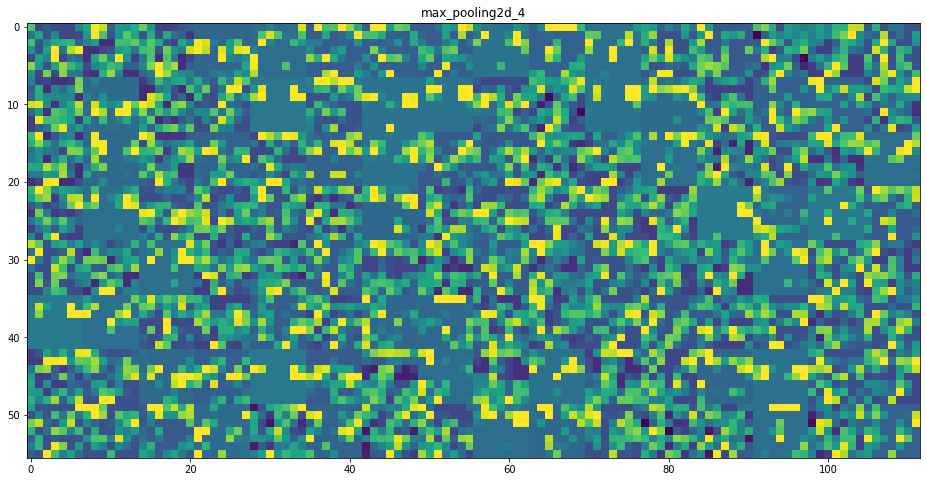

In [44]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] 
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0])) 
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')